## CNN을 활용한 분리수거
1. 맹인을 위해 어떤 프로그램을 만들면 좋을까 -> 분리수거를 도와주는 프로그램
2. 데이터 셋 수집: 분리수거 통을 직접 찍어 구성

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import cv2
import winsound
from glob import glob
from keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageGrab
from imutils.video import WebcamVideoStream  # Webcam영상 스트림을 위해 import

# 학습 데이터 셋 경로지정

In [2]:
trainPath = r'D:\intel\Recycling\data\train\\'

# 데이터 셋 시각화

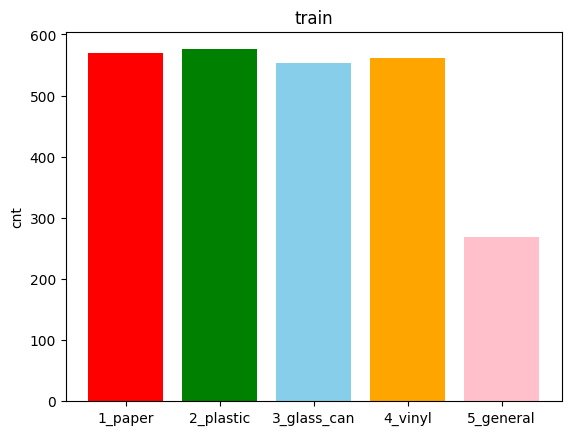

In [3]:

# 각 카테고리의 파일 리스트 가져오기
categories = ['1_paper', '2_plastic', '3_glass_can', '4_vinyl', '5_general']
file_counts = [len(os.listdir(f'D:/intel/Recycling/data/train/{category}')) for category in categories]

# 카테고리명과 파일 수를 이용하여 막대 그래프 그리기
plt.bar(categories, file_counts, color=['red', 'green', 'skyblue', 'orange', 'pink'])
plt.ylabel('cnt')
plt.title('train')
plt.show()

In [4]:
# 각 카테고리의 파일 수 출력
for category, count in zip(categories, file_counts):
    print(f'{category}: {count} 개')

1_paper: 570 개
2_plastic: 576 개
3_glass_can: 553 개
4_vinyl: 562 개
5_general: 268 개


# 하이퍼 파라미터 튜닝

In [5]:
numEpoch = 50
batchSize = 32
learningRate = 0.001
dropoutRate = 0.3
inputShare = (50, 66, 3)
numClass = 5

# 데이터 셋 증강

In [6]:
train_dataGenerator = ImageDataGenerator(
    rescale=1.0/255.0,
    zoom_range=0.2,
    horizontal_flip=True
)

train_dataGenerator = ImageDataGenerator(
    rescale=1.0/255.
)

test_dataGenerator = ImageDataGenerator(
    rescale=1./255.
)
train_generator = train_dataGenerator.flow_from_directory(
    trainPath,
    target_size=inputShare[:2],
    batch_size=batchSize,
    color_mode='rgb',
    class_mode='categorical'
)

Found 2529 images belonging to 5 classes.


# 모델 학습

In [7]:
# 모델 생성
model = models.Sequential()

# 첫 번째 합성곱층 추가
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=inputShare))
# 최대 풀링층 추가
model.add(layers.MaxPooling2D((2, 2)))
# 드롭아웃 적용
model.add(layers.Dropout(dropoutRate))

# 두 번째 합성곱층 추가
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# 최대 풀링층 추가
model.add(layers.MaxPooling2D((2, 2)))
# 드롭아웃 적용
model.add(layers.Dropout(dropoutRate))

# 데이터를 1차원으로 평탄화
model.add(layers.Flatten())

# 완전 연결층 추가
model.add(layers.Dense(64, activation='relu'))
# 드롭아웃 적용
model.add(layers.Dropout(dropoutRate))

# 출력층 추가 (클래스 개수에 따라 조정)
model.add(layers.Dense(numClass, activation='softmax'))

In [8]:
# 모델 컴파일
model.compile(optimizer=tf.optimizers.Adam(learningRate),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor = 'loss', patience = 3, restore_best_weights=True)

In [10]:
# 생성된 모델을 훈련 데이터로 학습
model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=numEpoch,
    callbacks=early_stopping,
)

C:\Users\user\AppData\Local\Temp\ipykernel_2432\4268230739.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/50
80/80 [==============================] - 23s 276ms/step - loss: 0.6921 - accuracy: 0.7256
Epoch 2/50
80/80 [==============================] - 9s 118ms/step - loss: 0.1046 - accuracy: 0.9684
Epoch 3/50
80/80 [==============================] - 9s 118ms/step - loss: 0.0556 - accuracy: 0.9862
Epoch 4/50
80/80 [==============================] - 9s 117ms/step - loss: 0.0376 - accuracy: 0.9889
Epoch 5/50
80/80 [==============================] - 9s 116ms/step - loss: 0.0271 - accuracy: 0.9917
Epoch 6/50
80/80 [==============================] - 9s 117ms/step - loss: 0.0350 - accuracy: 0.9901
Epoch 7/50
80/80 [==============================] - 10s 120ms/step - loss: 0.0211 - accuracy: 0.9945
Epoch 8/50
80/80 [==============================] - 9s 118ms/step - loss: 0.0209 - accuracy: 0.9945
Epoch 9/50
80/80 [==============================] - 10s 119ms/step - loss: 0.0175 - accuracy: 0.9968
Epoch 10/50
80/80 [==============================] - 10s 119ms/step - loss: 0.0119 - accuracy: 0.